<a href="https://colab.research.google.com/github/alessiocozzi/IMDB_Web_Scraping_Beautiful_Soup/blob/master/IMDB_Web_Scraping_Beautiful_Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB - Web Scraping with Beautiful Soup
###Name: Alessio Cozzi
br







In [76]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [77]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [78]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [0]:
first_movie = movie_containers[0]

In [80]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [81]:
first_movie.a

<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a>

In [82]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [83]:
first_movie.h3.a.text

'Logan'

In [84]:
first_name = first_movie.h3.a.text
first_name

'Logan'

In [85]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year.text

'(2017)'

In [86]:
first_year = first_year.text
first_year

'(2017)'

In [87]:
print(first_movie.prettify())

<div class="lister-item mode-advanced">
 <div class="lister-top-right">
  <div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342">
  </div>
 </div>
 <div class="lister-item-image float-left">
  <a href="/title/tt3315342/">
   <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
  </a>
 </div>
 <div class="lister-item-content">
  <h3 class="lister-item-header">
   <span class="lister-item-index unbold text-primary">
    1.
   </span>
   <a href="/title/tt3315342/">
    Logan
   </a>
   <span class="lister-item-year text-muted unbold">
    (2017)
   </span>
  </h3>
  <p class="text-muted ">
   <span class="certificate">
    R
   </span>
   <span class="ghost">
    |
   </span>
   <sp

In [88]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

In [89]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


In [90]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="565514" name="nv">565,514</span>

In [91]:
first_votes['data-value']

'565514'

In [0]:
first_votes = int(first_votes['data-value'])

In [93]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
print(eighth_movie_mscore)

<div class="inline-block ratings-metascore">
<span class="metascore favorable">84        </span>
        Metascore
            </div>


In [94]:
import numpy as np

names = []
years = []
imdb_ratings = []
metascores = []
votes = []


for countainer in movie_containers:
    name = countainer.h3.a.text
    names.append(name)
    year = countainer.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
    start_year = year.find('2')
    years.append(year[start_year:start_year+4])
    imdb_rating = float(first_movie.strong.text)
    imdb_ratings.append(imdb_rating)
    metascore = countainer.find('span', class_ = 'metascore favorable')
    if str(type(metascore)) == "<class 'NoneType'>":
        metascores.append(np.nan)
    else:
        metascores.append(int(metascore.text))
    vote = int(first_movie.find('span', attrs = {'name':'nv'})['data-value'])
    votes.append(vote)
    
    
print(names)
print(years)
print(imdb_ratings)
print(metascores)
print(votes)
    

['Logan', 'Wonder Woman', 'Thor: Ragnarok', 'Guardians of the Galaxy Vol. 2', 'Dunkirk', 'Star Wars: Episode VIII - The Last Jedi', 'Spider-Man: Homecoming', 'Get Out', 'Blade Runner 2049', 'Baby Driver', 'It', 'Three Billboards Outside Ebbing, Missouri', 'Justice League', 'The Shape of Water', 'John Wick: Chapter 2', 'Coco', 'Jumanji: Welcome to the Jungle', 'Kong: Skull Island', 'Beauty and the Beast', 'Kingsman: The Golden Circle', 'Pirates of the Caribbean: Dead Men Tell No Tales', 'Alien: Covenant', '13 Reasons Why', 'War for the Planet of the Apes', 'The Greatest Showman', 'Life', 'The Fate of the Furious', 'Murder on the Orient Express', 'Lady Bird', 'Ghost in the Shell', 'Wind River', 'King Arthur: Legend of the Sword', "The Hitman's Bodyguard", 'Mother!', 'Call Me by Your Name', 'The Mummy', 'Atomic Blonde', 'The Punisher', 'Bright', 'I, Tonya', 'Valerian and the City of a Thousand Planets', 'Baywatch', 'Darkest Hour', 'Money Heist', 'American Made', "The Handmaid's Tale", 'Mi

In [95]:
print(len(names),len(years),len(imdb_ratings),len(metascores),len(votes))

50 50 50 50 50


In [0]:
import pandas as pd
df = pd.DataFrame({'name':names, 'year':years, 'imdb_rating':imdb_ratings, 'metascore':metascores, 'vote':votes})

In [97]:
df

,name,year,imdb_rating,metascore,vote
0,Logan,2017,8.1,77.0,565514
1,Wonder Woman,2017,8.1,76.0,565514
2,Thor: Ragnarok,2017,8.1,74.0,565514
3,Guardians of the Galaxy Vol. 2,2017,8.1,67.0,565514
4,Dunkirk,2017,8.1,94.0,565514
5,Star Wars: Episode VIII - The Last Jedi,2017,8.1,85.0,565514
6,Spider-Man: Homecoming,2017,8.1,73.0,565514
7,Get Out,2017,8.1,84.0,565514
8,Blade Runner 2049,2017,8.1,81.0,565514
9,Baby Driver,2017,8.1,86.0,565514


In [98]:
df.dtypes

name            object
year            object
imdb_rating    float64
metascore      float64
vote             int64
dtype: object

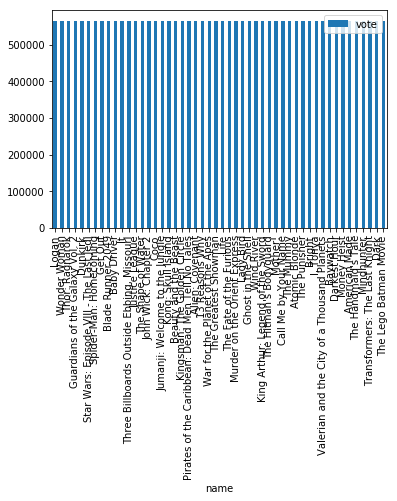

In [102]:
import matplotlib as plt
df.plot.bar(x='name',y='vote')